In [143]:
%config InlineBackend.figure_format = 'svg'


In [144]:
!python --version

Python 3.9.7


## 2.2 A quick tour of Python data analysis capabilities

This example uses pandas and seaborn. If you downloaded python using Anaconda, you already have them. If you are working in Colab, you may need to import packages on a regular basis (it resets your environment every once in a while).


In [145]:
#!pip install pandas seaborn

In [146]:
import pandas as pd
sat_df = pd.read_csv('https://bit.ly/PMR-ch2')
sat_df.Segment = sat_df.Segment.astype(pd.api.types.CategoricalDtype())
sat_df.head()

,iProdSAT,iSalesSAT,Segment,iProdREC,iSalesREC
0,6,2,1,4,3
1,4,5,3,4,4
2,5,3,4,5,4
3,3,3,2,4,4
4,3,3,3,2,2


This is a satisfaction dataset - 500 rows and 5 columns. It includes product satisfaction (iProdSAT), sales satisfaction (iSalesSAT), likelihood to recommend the product (iProdREC), and the salesperson (iSalesREC).

In [147]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   iProdSAT   500 non-null    int64   
 1   iSalesSAT  500 non-null    int64   
 2   Segment    500 non-null    category
 3   iProdREC   500 non-null    int64   
 4   iSalesREC  500 non-null    int64   
dtypes: category(1), int64(4)
memory usage: 16.4 KB


In [148]:
sat_df.describe()

,iProdSAT,iSalesSAT,iProdREC,iSalesREC
count,500.000000,500.000000,500.000000,500.000000
mean,4.130000,3.802000,4.044000,3.444000
std,1.091551,1.159951,1.299786,1.205724
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,3.000000
75%,5.000000,5.000000,5.000000,4.000000
max,7.000000,7.000000,7.000000,7.000000


<AxesSubplot:>

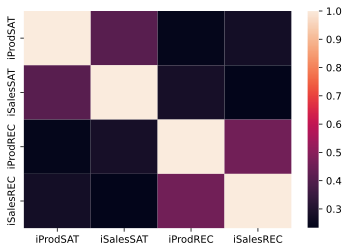

In [149]:
import seaborn as sns
sns.heatmap(sat_df.corr())

We can see (not suprising) that product satisfaction is correlated with salesperson satisfaction, and product recommendation with salesperson recommendation. 

In [150]:
sat_df.groupby('Segment').iProdSAT.mean()

Segment
1    3.462963
2    3.725191
3    4.103896
4    4.708075
Name: iProdSAT, dtype: float64

We can see whether group 4 is actually different using an ANOVA... here we do a one-way ANOVA. We will do more of this in the next week of class... so for now hang tight on interpreting the result. 

In [151]:
import statsmodels.formula.api as smf
from statsmodels.stats import anova as sms_anova
segment_psat_lm = smf.ols('iProdSAT ~ -1 + Segment',
                          data=sat_df).fit()
sms_anova.anova_lm(segment_psat_lm)

,df,sum_sq,mean_sq,F,PR(>F)
Segment,4.0,8627.850038,2156.962510,2160.66543,3.569726e-312
Residual,496.0,495.149962,0.998286,NaN,NaN


<ErrorbarContainer object of 3 artists>

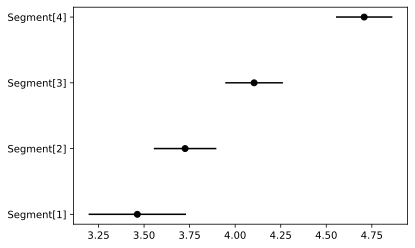

In [152]:
import matplotlib.pyplot as plt
plt.errorbar(y=segment_psat_lm.params.index,
             x=segment_psat_lm.params.values,
             xerr=segment_psat_lm.conf_int()[1].T
                  - segment_psat_lm.params,
             fmt='ko')

## Basics of working with Python commands

In [153]:
x = [1, 23, 6]
print(x)

[1, 23, 6]


In [154]:
#remember that variables are case sensitive.... if I have a lowercase (x) and try and print an uppercase (X) I get an error
print(X)

NameError: name 'X' is not defined

In [ ]:
x = [1, 23, 6] # Initialize a list

In [ ]:
# Initialize a list
x = [1, 23, 6]
print(x)

[1, 23, 6]


## 2.4 Built-in types

### 2.4.1 Booleans

In [ ]:
1 == 1

True

In [ ]:
1 < 2

True

In [ ]:
1 == 2

False

In [ ]:
h = 1
h == 2

False

In [ ]:
h == 1

True

In [ ]:
j = h==1
j

True

### 2.4.2 Numeric types

int

In [ ]:
x = 2
y = 4
x + y

6

In [ ]:
type(x)

int

In [ ]:
type(y)

int

In [ ]:
w = x/y
w

0.5

In [ ]:
type(w)

float

In [ ]:
x ** y

16

float

In [ ]:
z = 3.2
type(x * z)

float

## 2.4.3 Sequence types

list

In [ ]:
x = [0, 1, 2, 3, 4, 5]
y = ['a', 'b', 'c']

In [ ]:
x + y

[0, 1, 2, 3, 4, 5, 'a', 'b', 'c']

In [ ]:
#lists can have more than 1 type of variable
x.append('r')
x

[0, 1, 2, 3, 4, 5, 'r', 'r']

In [ ]:
len(x)

8

In [ ]:
#remember that python starts counting at 0. So 0, 1, 2, 3
x[1]

1

In [ ]:
#when you index... also count from 0
# indexing like includes the first value but not the last
x[2:4]

[2, 3]

In [ ]:
#if you don't specify the first value, python starts from the beginning of your list
x[:2]

[0, 1]

In [ ]:
#if you don't specify the last value, python starts where you tell it, and goes to
# the end
x[1:]

[1, 2, 3, 4, 5, 'r', 'r']

In [ ]:
# so what happens with a negative value?
x[-2:]

['r', 'r']

In [ ]:
#we can also change a list. Here we tell python to take the 3rd 
# value (0,1,2) and replace it with
# the word 'freeze'
x[2] = 'freeze'
x

[0, 1, 'freeze', 3, 4, 5, 'r', 'r']

tuples

In [ ]:
#tuples are a lot like lists
z = (7, 8, 9)

In [ ]:
#they can be indexed in the same way
z[1]

8

In [ ]:
#but tuples are immutable! 
z[1] = 'boil'

TypeError: 'tuple' object does not support item assignment

ranges

In [ ]:
# ranges are just sequences of values (numbers mostly)
#a range can have 3 arguments 1. Start 2. Stop. 4. Step. 
#of these... only the stop is a required argument

#Here we have a range with a stop of 10
# so python starts at 0, and stops at 10
range(10)

range(0, 10)

In [ ]:
#if we cast range to a list... we get a list with 10 values
# it stops at 10 values... so that is 0-9!
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
#but we could specify a start value too
list(range(2,12))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [ ]:
#or a step value
list(range(2, 12, 2))

[2, 4, 6, 8, 10]

### 2.4.4 Text sequence type - str

In [ ]:
x = 'Hello'
y = "World"
x+y

'HelloWorld'

In [ ]:
#you can index from a string... 
x[0:2]

'He'

In [ ]:
x[ :5]

'Hello'

In [ ]:
#strings have some other specific methods like...
x.lower()

'hello'

In [ ]:
x.upper()

'HELLO'

In [ ]:
#or you can go a little crazy and replace stuff too
x.replace('lo', 'p')

'Help'

In [ ]:
#but keep in mind... you have NOT changed the underlying variable yet
x

'Hello'

In [ ]:
#useful when managing text, is splitting text using a delimeter
'Hello, World, what a day!'.split(',')

['Hello', ' World', ' what a day!']

In [ ]:
#you could even save it as a new list
string_of_text = 'this is a string of text. I want it split into sentences. What should I do!' 
sentence_list = string_of_text.split('.')
sentence_list

['this is a string of text',
 ' I want it split into sentences',
 ' What should I do!']

In [ ]:
#Now we can work some real magic, and start parsing that list even more!
sentence_list[0]

'this is a string of text'

In [ ]:
#we could even try splitting it into words
string_of_text.split(' ')

['this',
 'is',
 'a',
 'string',
 'of',
 'text.',
 'I',
 'want',
 'it',
 'split',
 'into',
 'sentences.',
 'What',
 'should',
 'I',
 'do!']

Ok that might all seem like just fun and games.. but when you start working with text... this becomes really useful

### 2.4.5 Set types

In [ ]:
#sets are unordered collections of distinct values
x = [1, 1, 3, 8, 12, 12]
set(x)

{1, 3, 8, 12}

In [ ]:
y = ['nope', 'nope', 'yep']
set(y)

{'nope', 'yep'}

In [ ]:
# sets allow you to quickly see if something is in the set. Here we are just querying whether or not the set has a 3
3 in x

True

In [ ]:
#...or a 5
5 in x

False

In [ ]:
#or we can look at whats the same...
x = set([1, 1, 3, 8, 12, 12])
y = set([2, 2, 8, 9])
x.intersection(y)

{8}

In [ ]:
#...different
y.difference(x)

{2, 9}

In [ ]:
x.difference(y)

{1, 3, 12}

In [ ]:
#or put them together
x.union(y)

{1, 2, 3, 8, 9, 12}

### 2.4.6 Mapping types

Dictionaries are insanely useful... the 'why' is a little out of scope for a quick intro. But basically they use one object to index another. That can save a lot of computation 


In [ ]:
#two ways to create dictionaries
x = dict(a=1, b=2, c=3)
x

{'a': 1, 'b': 2, 'c': 3}

In [ ]:
x = {'a': 1, 'b': 2, 'c': 3}
x

{'a': 1, 'b': 2, 'c': 3}

In [ ]:
#now when we 'ask' what a is indexed to
x['a']

1

In [ ]:
x.keys()

dict_keys(['a', 'b', 'c'])

In [ ]:
x.values()

dict_values([1, 2, 3])

### 2.4.7 Functions, classes, and methods

In [ ]:
#fucntions can be really basic

def add(a, b):
  return a + b

In [ ]:
#but we can build on this!
add(3, 4)

7

In [ ]:
add(a=3, b=4)

7

In [ ]:
def add(a, b=0):
  return a + b

In [ ]:
add(3)

3

In [ ]:
#what is happening here?!
add(3, 4)

7

### 2.4.9 Control flow

#### If statement

In [ ]:
x = 5
if x > 2:
  print('x = {}, which is greater than 2'.format(x))
print('Done!')

x = 5, which is greater than 2
Done!


In [ ]:
#That works, but doesn't handle all cases very well
x = 0
if x > 2:
  print('x = {}, which is greater than 2'.format(x))
print('Done!')

Done!


In [ ]:
#adding an 'else' helps!

x = 0
if x > 2:
  print('x = {}, which is greater than 2'.format(x))
else:
  print('x = {}, which is less than or equal to 2'.format(x))

x = 0, which is less than or equal to 2


In [ ]:
#but maybe one more for the last case (equal too)
x = 2
if x > 2:
  print('x = {}, which is greater than 2'.format(x))
elif x == 2:
  print('x = {}, which equals 2!'.format(x))
else:
  print('x = {}, which is less than 2'.format(x))

x = 2, which equals 2!


In [ ]:
def check_present(value, values):
  if value in values:
    print('{} was found in the values'.format(value))
  else:
    print('{} was NOT found in the values'.format(value))

In [ ]:
a = set([4, 2, 5, 1, 12, 33])
check_present(38, a)
check_present(12, a)

38 was NOT found in the values
12 was found in the values


#### While statement

In [ ]:
x = 0
while x < 5:
  print(x)
  x += 1

0
1
2
3
4


In [ ]:
a = [4, 2, 5, 1, 12, 33]
a_squared = []
i = 0
while i < len(a):
  a_squared.append(a[i]**2)
  i += 1
print('a_squared generated: {}'.format(a_squared))

a_squared generated: [16, 4, 25, 1, 144, 1089]


#### For statements

In [ ]:
#the big difference to keep in mind is simply this...
#while loops work by using a index to reference understand what to do next
#for loops, just iterate through the list (from beginning to end)

a = [4, 2, 5, 1, 12, 33]
a_squared = []
for x in a:
  a_squared.append(x**2)
print('a_squared generated: {}'.format(a_squared))

a_squared generated: [16, 4, 25, 1, 144, 1089]


In [ ]:
for i in range(5):
  print(i)

0
1
2
3
4


### 2.5.1 NumPy

#### Array

In [ ]:
import numpy as np

In [ ]:
x = np.array([1, 3, 4])
print(x)
print(x.dtype)

[1 3 4]
int32


In [ ]:
x = np.array([1, 3, 4, 'a', 'b'])
print(x)
print(x.dtype)

['1' '3' '4' 'a' 'b']
<U11


In [ ]:
a = [7, 4, 2, 22, -12]
a[:3]

[7, 4, 2]

In [ ]:
x = np.array(a)
x[:3]

array([7, 4, 2])

In [ ]:
x[[0, 3]]

array([ 7, 22])

In [ ]:
a[[0, 3]]

TypeError: list indices must be integers or slices, not list

In [ ]:
x[[True, False, False, True, False]]

In [ ]:
A = [[1, 2, 3],
    [4, 5, 6]]
A

In [ ]:
A[0]

In [ ]:
A[1][2]

In [ ]:
aA = np.array(A)
aA[0, :]

In [ ]:
aA[:, 1]

In [ ]:
aA[1, 2]

In [ ]:
x = np.empty(shape=5, dtype=np.int32)
x

In [ ]:
x = np.zeros(shape=5)
x

### Pandas

In [ ]:
import pandas as pd

#### Series

In [ ]:
a = [7, 4, 2, 22, -12]
x = pd.Series(a)
x

0     7
1     4
2     2
3    22
4   -12
dtype: int64

In [ ]:
x.index

RangeIndex(start=0, stop=5, step=1)

In [ ]:
x.values

array([  7,   4,   2,  22, -12], dtype=int64)

In [ ]:
x = pd.Series(a, index=['a', 'b', 'c', 'd', 'e'])
x['a']

7

In [ ]:
x

a     7
b     4
c     2
d    22
e   -12
dtype: int64

In [ ]:
x[['b', 'd', 'e']]

b     4
d    22
e   -12
dtype: int64

In [ ]:
start_time = pd.datetime.strptime('2019-04-09', '%Y-%m-%d')
x = pd.Series(a,
              index=pd.date_range(start=start_time,
                                  normalize=True, periods=5)
             )
x

C:\Users\JOELDA~1\AppData\Local\Temp/ipykernel_21860/3283169014.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  start_time = pd.datetime.strptime('2019-04-09', '%Y-%m-%d')


2019-04-09     7
2019-04-10     4
2019-04-11     2
2019-04-12    22
2019-04-13   -12
Freq: D, dtype: int64

In [ ]:
x + 5

2019-04-09    12
2019-04-10     9
2019-04-11     7
2019-04-12    27
2019-04-13    -7
Freq: D, dtype: int64

In [ ]:
x**2

2019-04-09     49
2019-04-10     16
2019-04-11      4
2019-04-12    484
2019-04-13    144
Freq: D, dtype: int64

#### Data Frames

In [ ]:
a = [7, 4, 2, 22, -12]
b = [34, 2, 9, -5, -18]
ab_df = pd.DataFrame({'a': a, 'b': b})
ab_df

,a,b
0,7,34
1,4,2
2,2,9
3,22,-5
4,-12,-18


In [ ]:
ab_df = pd.DataFrame({'a': a, 'b': b},
                     index=pd.date_range(start=start_time,
                                  normalize=True, periods=5))
ab_df

,a,b
2019-04-09,7,34
2019-04-10,4,2
2019-04-11,2,9
2019-04-12,22,-5
2019-04-13,-12,-18


In [ ]:
# there are a few different ways to get information back out.
ab_df['a']

2019-04-09     7
2019-04-10     4
2019-04-11     2
2019-04-12    22
2019-04-13   -12
Freq: D, Name: a, dtype: int64

In [ ]:
ab_df.a

2019-04-09     7
2019-04-10     4
2019-04-11     2
2019-04-12    22
2019-04-13   -12
Freq: D, Name: a, dtype: int64

The infamous loc and iloc

**loc** is used to index a pandas DataFrame or Series using the labels

**iloc** is used to retrieve a record based it's positional index. (index is the 'i' in iloc. Okay actually its something like 'integers' but stop being picky. This memory trick works)


In [ ]:
ab_df

,a,b
2019-04-09,7,34
2019-04-10,4,2
2019-04-11,2,9
2019-04-12,22,-5
2019-04-13,-12,-18


In [ ]:
#so using a label...like the date we have in this dataframe!
ab_df.loc['2019-04-10']

a    4
b    2
Name: 2019-04-10 00:00:00, dtype: int64

In [ ]:
#and the same values using where they are (the index in iloc part)
ab_df.iloc[1]

a    4
b    2
Name: 2019-04-10 00:00:00, dtype: int64

In [ ]:
#we could get columns the same way!
ab_df.loc[ :, 'b']

2019-04-09    34
2019-04-10     2
2019-04-11     9
2019-04-12    -5
2019-04-13   -18
Freq: D, Name: b, dtype: int64

In [ ]:
ab_df.iloc[:, 1]

2019-04-09    34
2019-04-10     2
2019-04-11     9
2019-04-12    -5
2019-04-13   -18
Freq: D, Name: b, dtype: int64

In [ ]:
ab_df.head(3)

,a,b
2019-04-09,7,34
2019-04-10,4,2
2019-04-11,2,9


In [ ]:
ab_df.mean()

a    4.6
b    4.4
dtype: float64

In [ ]:
#the default behavior is for the method to operate on the columns. This is the same as the result above!
ab_df.mean(axis=0)

a    4.6
b    4.4
dtype: float64

In [ ]:
#but we can 'pivot' this by telling the method (the method here is .mean) to look at axis=1 (rows)
#python is so cool...
ab_df.mean(axis=1)

2019-04-09    20.5
2019-04-10     3.0
2019-04-11     5.5
2019-04-12     8.5
2019-04-13   -15.0
Freq: D, dtype: float64

In [ ]:
store_id = pd.Series([3, 14, 21, 32, 54],dtype='category') # store id
store_rev = [543, 654, 345, 678, 234] # store revenue, $1000
store_visits = [45, 78, 32, 56, 34] # visits, 1000s
store_manager = ['Annie', 'Bert', 'Carla', 'Dave', 'Ella']
store_df = pd.DataFrame({'id': store_id,
                         'rev': store_rev,
                         'visits': store_visits,
                         'manager': store_manager})
store_df

,id,rev,visits,manager
0,3,543,45,Annie
1,14,654,78,Bert
2,21,345,32,Carla
3,32,678,56,Dave
4,54,234,34,Ella


In [ ]:
store_df.manager

0    Annie
1     Bert
2    Carla
3     Dave
4     Ella
Name: manager, dtype: object

In [ ]:
store_df.rev.mean()

490.8

In [ ]:
store_df.corr()

,rev,visits
rev,1.000000,0.829103
visits,0.829103,1.000000


In [155]:
store_df.describe()

,rev,visits
count,5.000000,5.000000
mean,490.800000,49.000000
std,194.683589,18.841444
min,234.000000,32.000000
25%,345.000000,34.000000
50%,543.000000,45.000000
75%,654.000000,56.000000
max,678.000000,78.000000


### Missing data

In [ ]:
np.nan

In [ ]:
type(np.nan)

In [ ]:
x = np.array([3., 4., 6., 2., np.nan, 18., np.nan])
x

In [ ]:
np.mean(x)

In [ ]:
np.nanmean(x)

In [ ]:
np.isnan(x)

In [ ]:
~np.isnan(x)

In [ ]:
np.mean(x[~np.isnan(x)])

In [ ]:
x = np.array([3., 4., 6., 2., -999, 18., -999])
x.mean()

In [ ]:
x[x == -999] = np.nan
np.nanmean(x)

In [ ]:
np.log(np.array([-1, 0, 1]))

## Loading and saving data

### Importing data

In [156]:
import pandas as pd
df = pd.read_csv("../data/covid_survey_full.csv")
df.head()

,age,gender,emp,income,children,region,area,choice,concerns
0,62.0,Female,Out of work but not currently looking for work,NaN,None,Midwest,Suburban,"Type of food, cleanliness, price, atmosphere",Food safety and contracting covid 19
1,69.0,Female,Retired,NaN,None,Midwest,Urban,bet food and prices,none
2,21.0,Male,Student,NaN,1,Northeast,Urban,I look for good food,I might not eat food from restaurants.
3,31.0,Male,Military,21.0,None,South,Urban,Cleanliness,Cleanliness
4,80.0,Male,Retired,28.0,None,South,Rural,reasonable prices good food,can't afford


In [157]:
import pandas as pd
import os
filepath = ("../data")
df_path = os.path.join(filepath, 'covid_survey_full.csv')
print(df_path)

../data\covid_survey_full.csv


In [159]:
df.describe()

,age,income
count,494.000000,473.000000
mean,45.801619,58.657505
std,17.213524,35.165424
min,18.000000,1.000000
25%,31.000000,29.000000
50%,43.000000,54.000000
75%,61.000000,91.000000
max,82.000000,120.000000


### data and Colab

In [ ]:
#this code is for colab...
from google.colab import files
uploaded = files.upload()

In [ ]:
uploaded.describe()

In [ ]:
import pandas as pd

import io
df = pd.read_csv(io.BytesIO(uploaded['covid_survey_full.csv']))

In [ ]:
df.describe()